# Coordenades baricèntriques en quadrilàters
Càlcul de les coordenades baricèntriques en un cuadrilàter fent servir el mètode de Newton.

## Exemple
Calculeu les coordenades baricèntriques $\alpha = (\alpha_{1}, \alpha_{2}, \alpha_{3}, \alpha_{4})$ del punt $p = (4.0, 0.5)$ respecte del quadrilàter definit pels vèrtexs,
$$
v_{1} = (2.5, -1.0),\quad v_{2} = (5.5, -0.5),\quad v_{3} = (5.0, 1.0),\quad v_{4} = (3.5, 1.5)
$$



In [470]:
import numpy as np


#print(type(alphas))

### Posició dels vèrtexs del rectangle $R$:
 $$
 u_{1} = (0, 0),\quad u_{2} = (1, 0),\quad u_{3} = (1, 1),\quad u_{4} = (0, 1)$$

In [471]:
# Vèrtexs del rectangle R
u1 = np.array([0, 0])
u2 = np.array([1, 0])
u3 = np.array([1, 1])
u4 = np.array([0, 1])

vertexsR = np.array([u1, u2, u3, u4])
vertexsRPlot = np.array([u1, u2, u3, u4, u1])

print('Posició dels vèrtexs de R:')
print(f'u1 = {vertexsR[0, :]},\
 u2 = {vertexsR[1, :]},\
 u3 = {vertexsR[2, :]},\
 u4 = {vertexsR[3, :]}')

Posició dels vèrtexs de R:
u1 = [0 0], u2 = [1 0], u3 = [1 1], u4 = [0 1]


### Posició dels vèrtexs del quadrilàter $Q$:
$$
v_{1} = (2.5, -1.0),\quad v_{2} = (5.5, -0.5),\quad v_{3} = (5.0, 1.0),\quad v_{4} = (3.5, 1.5)
$$

In [472]:
# Vèrtexs del quadrilàter Q
v1 = np.array([2.5, -1.0])
v2 = np.array([5.5, -0.5])
v3 = np.array([5.0, 1.0])
v4 = np.array([3.5, 1.5])

vertexsQ = np.array([v1, v2, v3, v4])
vertexsQPlot = np.array([v1, v2, v3, v4, v1])

print('Posició dels vèrtexs de Q:')
print(f'v1 = {vertexsQ[0, :]},\
 v2 = {vertexsQ[1, :]},\
 v3 = {vertexsQ[2, :]},\
 v4 = {vertexsQ[3, :]}')

Posició dels vèrtexs de Q:
v1 = [ 2.5 -1. ], v2 = [ 5.5 -0.5], v3 = [5. 1.], v4 = [3.5 1.5]


### Càlcul de les coordenades baricèntriques del punt $p = (4.0, 0.5)\in Q$

In [473]:
# Coordenades cartesianes del punt p
v = np.array([4.0, 0.5]) # Coordenades del punt p
print(f'Coordenades del punt p = [{v[0]}, {v[1]}]')


Coordenades del punt p = [4.0, 0.5]


### Vectors $a$, $b$, $c$, $d$:
$$
a = v_{1} - p,\quad
b = v_{2} - v_{1},\quad
c = v_{4} - v_{1},\quad
d = v_{1} - v_{2} + v_{3} - v_{4}
$$

In [474]:
# Càlcul dels vectors a, b, c i d
a = np.subtract(v1, v)
b = np.subtract(v2, v1)
c = np.subtract(v4, v1)
d = np.subtract(v1, v2) + np.subtract(v3, v4)

print('Vectors a, b, c, d:')
print(f'a = {a}, b = {b}, c = {c}, d = {d}')

Vectors a, b, c, d:
a = [-1.5 -1.5], b = [3.  0.5], c = [1.  2.5], d = [-1.5 -1. ]


### Mètode de Newton-Raphson
Busquem la anti-imatge del punt $p$ per la transformació isoparamètrica, i.e. busquem $q = (\lambda, \mu)$ tal que, $P(q) = p$, on
\begin{align*}
p = P(\lambda, \mu) &= (1-\lambda)(1-\mu)v_{1} + \lambda ( 1 - \mu) v_{2} + \lambda\mu v_{3} + (1-\lambda)\mu v_{4}\\
&= a + \lambda b + \mu c + \lambda\mu d.
\end{align*}

In [475]:
# Mètode de Newton-Raphson

tol = 0.5e-12
max_iter = 20
non_conv_dist = 10.0
alphas = np.array([-1, -1, -1, -1])
is_inside = 1
x = np.array([0.5, 0.5]).T # lambda = x[0], mu = x[1]


print('Mètode de Newton-Raphson')
print(f'tol = {tol}, Num max. iterats = {max_iter}')
#non_conv_dist = 10.0
#alphas = np.array([-1.0, -1.0, -1,0, -1.0])
#is_inside = 0

print('Mètode de Newton-Raphson')
print(f'tol = {tol}, Num max. iterats = {max_iter}')

Mètode de Newton-Raphson
tol = 5e-13, Num max. iterats = 20
Mètode de Newton-Raphson
tol = 5e-13, Num max. iterats = 20


In [476]:
# Fem un print de cada iteració del mètode
print('Iteracions')

for i in range(0, max_iter):
    Df = np.array([b + x[1]*d, c + x[0]*d]).T
    f = np.transpose(a + x[0] * b + x[1]* c + x[0] *  x[1] * d)

    delta = np.linalg.solve(Df,-f)
    x = x + delta
    err = np.linalg.norm(delta, np.inf)

    i1 = i + 1
    print('Iterat: {:3d}, lambda = {:13.8e} mu = {:13.8e}, err = {:10.4e}'.\
          format(i1, x[0], x[1], err))

    if ( norm_x := np.linalg.norm(x, np.inf) ) > non_conv_dist:
        print(f'||x|| = {norm_x} > {non_conv_dist}')
        is_inside = 0
        break

    if err < tol:
        print(f'Convergència en {i1} iterats')

        # Calculem les coordenades baricèntriques del punt

        alphas = np.array([(1 - x[0])*(1- x[1]),
        x[0] * (1 - x[1]),
        x[0] * x[1],
        (1 - x[0]) * x[1]])

        if np.min(alphas) < 0: # Si hi ha alguna alpha < 0: is_inside = 0
            is_inside = 0

        # Fem un print de les coordenades baricèntriques
        print('\nSolució')
        print('lambda = {:13.8e}, mu = {:13.8e}, err = {:10.4e}'.
              format(x[0], x[1], err))

        break
else:
    print(f'No hi ha convergència en {i1} iterats')
    is_inside = 0

print('alpha = [{:13.8e}, {:13.8e}, {:13.8e}, {:13.8e}]'.
              format(alphas[0], alphas[1], alphas[2], alphas[3]))
print(f'Is inside? = {is_inside}')

Iteracions
Iterat:   1, lambda = 4.30555556e-01 mu = 6.25000000e-01, err = 1.2500e-01
Iterat:   2, lambda = 4.25020129e-01 mu = 6.20471014e-01, err = 5.5354e-03
Iterat:   3, lambda = 4.25036024e-01 mu = 6.20484019e-01, err = 1.5895e-05
Iterat:   4, lambda = 4.25036024e-01 mu = 6.20484019e-01, err = 1.3106e-10
Iterat:   5, lambda = 4.25036024e-01 mu = 6.20484019e-01, err = 4.8474e-17
Convergència en 5 iterats

Solució
lambda = 4.25036024e-01, mu = 6.20484019e-01, err = 4.8474e-17
alpha = [2.18208017e-01, 1.61307963e-01, 2.63728060e-01, 3.56755959e-01]
Is inside? = 1


#### Plot
 Dibuixem la antiimagte (en blau) del punt $p$ (en vermell)

Dibuixem la antiimatge (en blau) del punt p (en vermell)


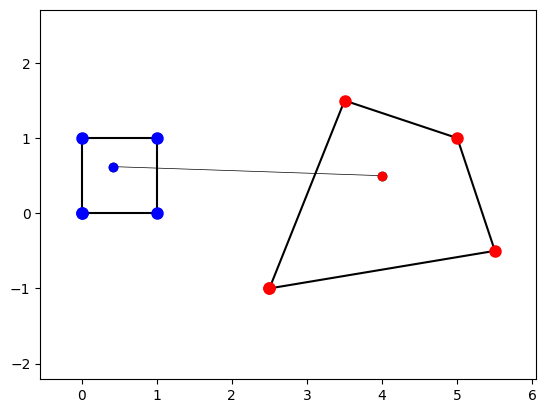

In [477]:
import matplotlib.pyplot as plt

points_x = np.concatenate(\
    (vertexsR[:, 0], vertexsQ[:, 0], np.array([v[0], x[0]])), axis = None)
points_y = np.concatenate(
    (vertexsR[:, 1], vertexsQ[:, 1], np.array([v[1], x[1]])), axis = None)

xmin = np.min(points_x); xmax = np.max(points_x)
lx = xmax - xmin
xmin -= 0.1*lx; xmax += 0.1*lx

ymin = np.min(points_y); ymax = np.max(points_y)
ly = ymax - ymin
ymin -= 0.1*ly; ymax += 0.1*ly

fig,axs = plt.subplots()

axs.plot(vertexsQPlot[:, 0], vertexsQPlot[:, 1], 'o-k',\
         mfc = 'red', mec = 'red', ms = 8)
axs.plot(vertexsRPlot[:, 0], vertexsRPlot[:, 1], 'o-k',\
         mfc = 'blue', mec = 'blue', ms = 8)

axs.axis('equal')
axs.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lineP = np.array([x, v], dtype='float64')

#Dibuixem la antiimatge de p
print('Dibuixem la antiimatge (en blau) del punt p (en vermell)')
axs.plot(lineP[:, 0], lineP[:, 1], 'o-', color ='black', lw = 0.5)
axs.plot(x[0], x[1], 'o', mfc = 'blue', mec = 'blue', ms = 6)
axs.plot(v[0], v[1], 'o', mfc = 'red', mec = 'red', ms = 6)